# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

In [39]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

sns.set_theme(style="ticks", color_codes=True)

In [5]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.set_index('Customer', drop=True, inplace=True)

### Instructions

#### 1. Open the `categoricals` variable we created before.

In [6]:
categoricals = data.select_dtypes(object)
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

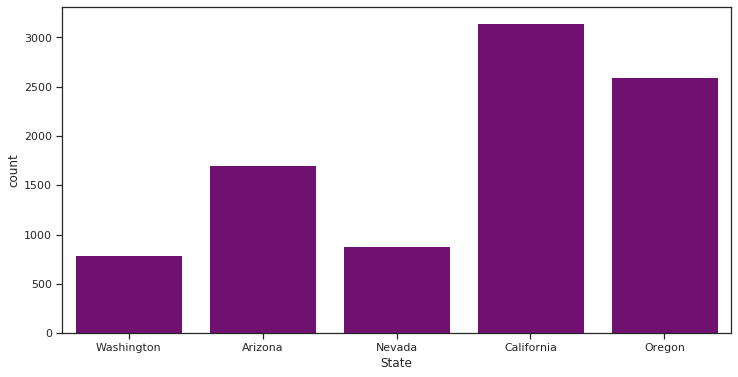

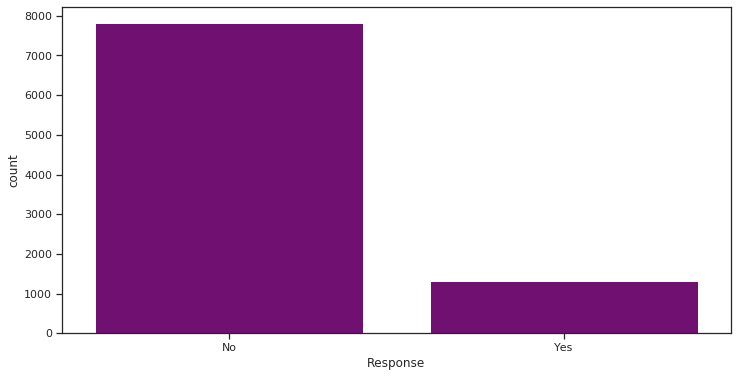

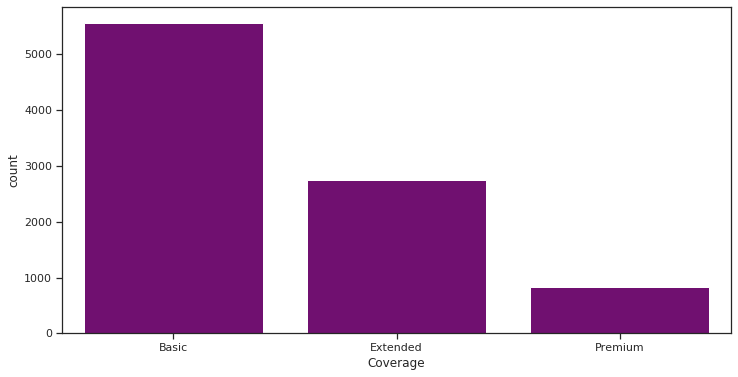

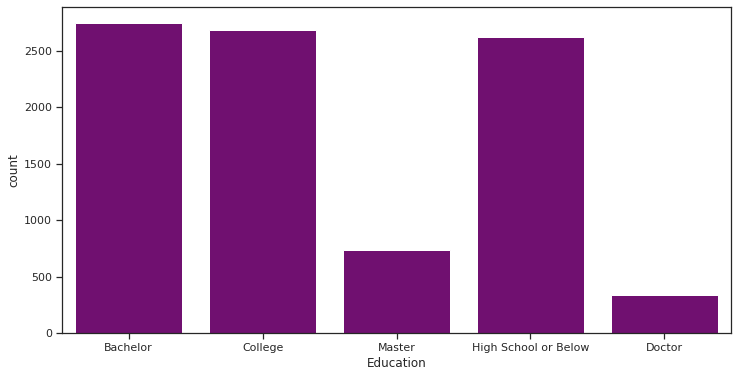

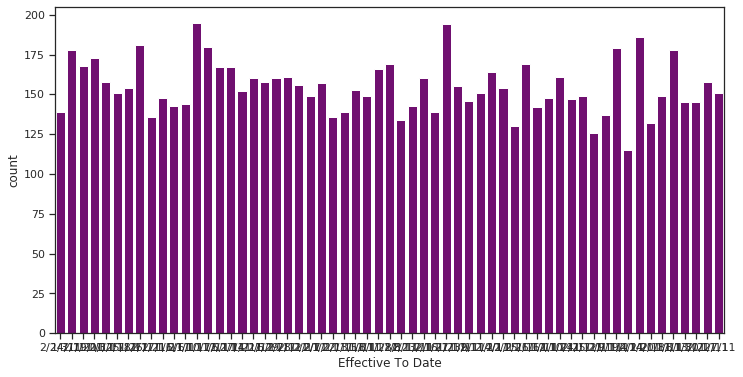

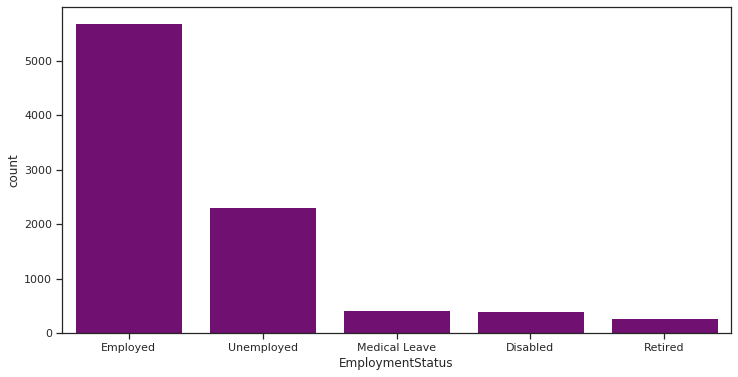

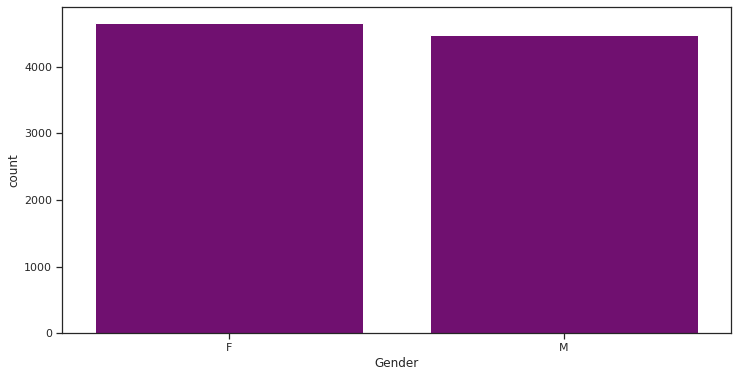

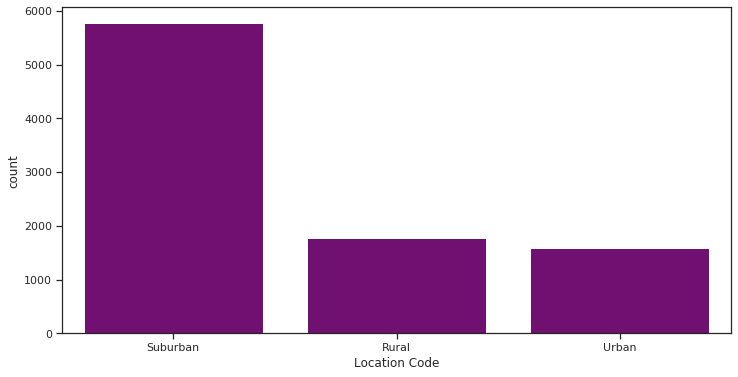

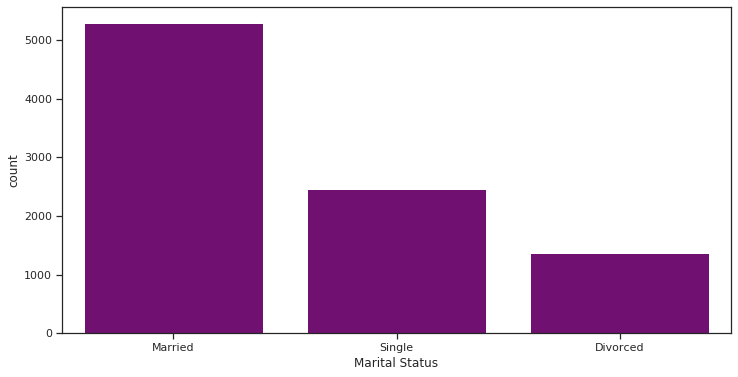

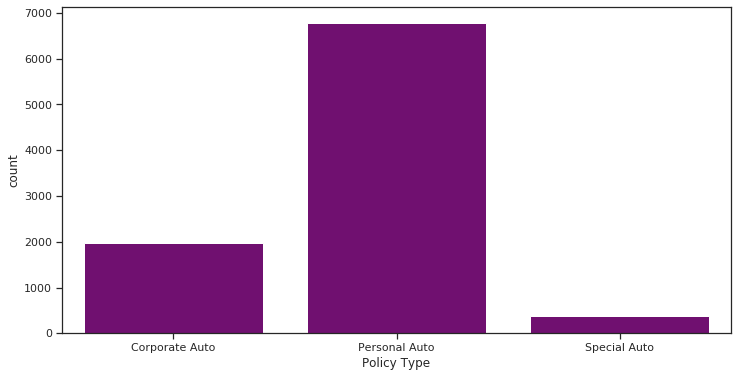

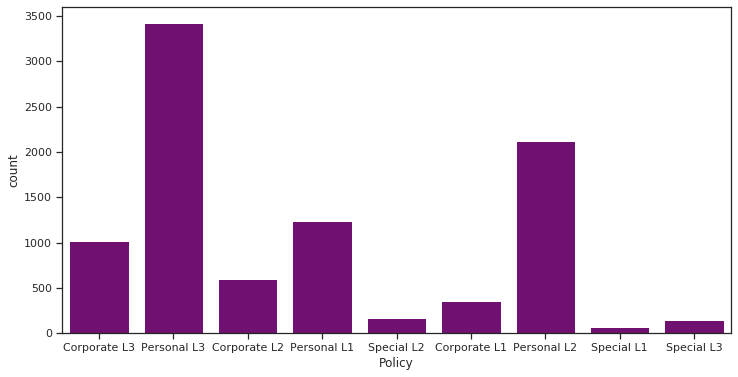

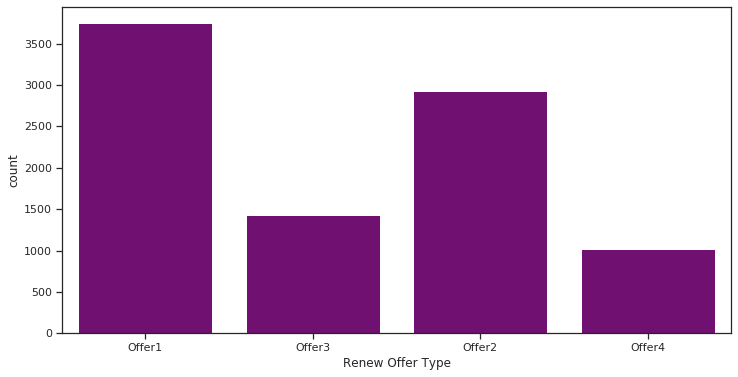

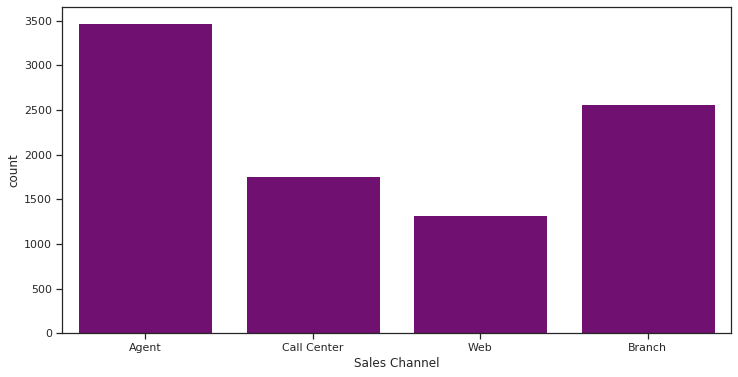

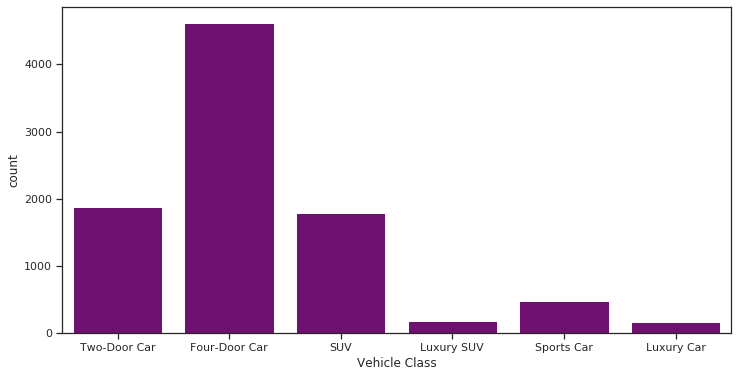

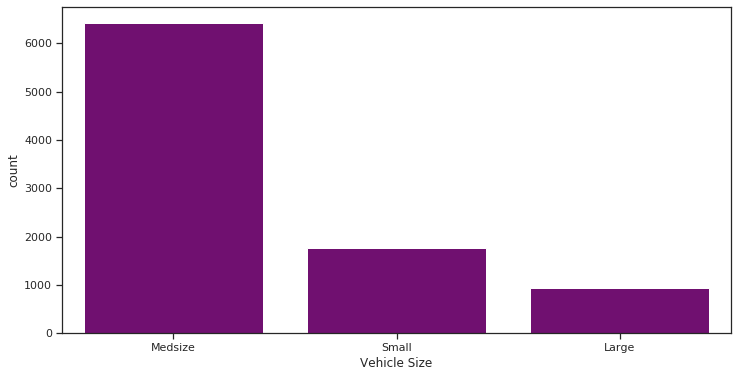

In [41]:
for col in categoricals.columns:
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.countplot(col, data=categoricals, color='purple')
    plt.show()

**Observations:**
* The Effective to Date plot will not show right as it's a datetime feature
- The customers have a uniform gender distribution => Does the total claim amount differ significantly amongst the 2?
* The policy & policy type columns mean the same thing, so we can keep only one of them, depending on the level of detail we need
- The vehicle class & vehicle size also refer to the same vehicle attribute, so we can keep only one of them depending on the required level of detail
* Most customers had a 'No' response, so this column might be redundant
- The most successful sales channel was the agent sales, and the rest follow closely at similar levels 
* The most successful offer was Offer1, followed closely by Offer2, and then Offer3 and Offer4 => Is this related to the sales channel?
- Most customers typically:

    * Have a basic coverage
    - Have higher studies
    * Come from suburban areas
    - Have medium sized vehicles
    * Insure their personal vehicle
    - Are married
    * Replied 'No'

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [22]:
# Check the No response proportion
total_no = data.Response.value_counts().loc['No']
total_rows = data.shape[0]
print(round(total_no * 100 / total_rows, 2), "%")

85.68 %


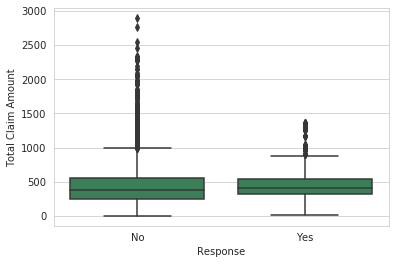

In [24]:
# Does the total claim amount differ a lot between Yes & No respondents?
sns.boxplot(x='Response', y='Total Claim Amount', data=data, color='seagreen')
plt.show()

There's not a big difference in the total claim amount for the average customer that responded with 'No' versus the one that responded with 'Yes'. However, the 'No' respondents have more outliers compared to the rest.

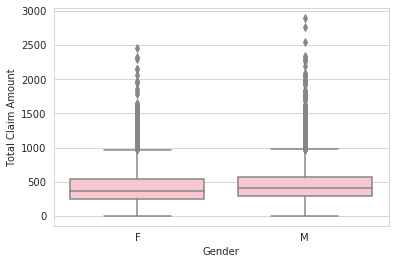

In [26]:
# Does the total claim amount differ a lot between Male & Female respondents?
sns.boxplot(x='Gender', y='Total Claim Amount', data=data, color='pink')
plt.show()

There's not a big difference in the total claim amount that can be attributed to the customer's gender, so we can remove the column.

In [27]:
data.drop('Gender', axis=1, inplace=True)

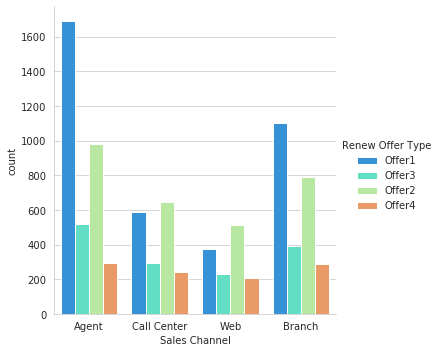

In [34]:
# Is the offer type related to the sales channel?
sns.catplot(x='Sales Channel', hue='Renew Offer Type', data=data,\
     kind='count', palette='rainbow')
plt.show()

There's no explicit correlation between the sales channel & renewal offer type.

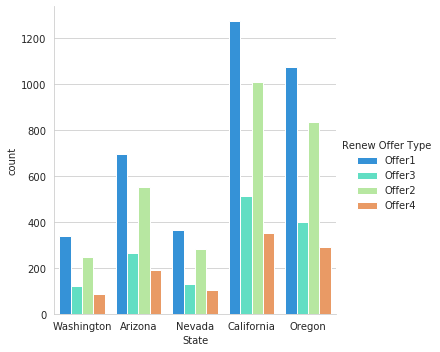

In [35]:
# Is the offer type related to the location?
sns.catplot(x='State', hue='Renew Offer Type', data=data,\
     kind='count', palette='rainbow')
plt.show()  # Nope

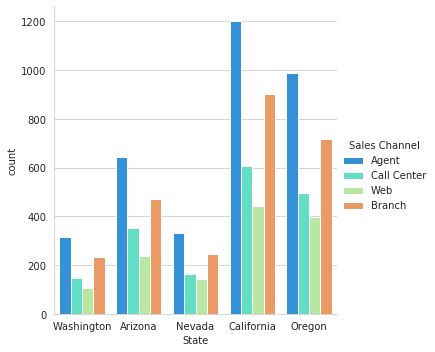

In [36]:
# Is the sales channel related to the location?
sns.catplot(x='State', hue='Sales Channel', data=data,\
     kind='count', palette='rainbow')
plt.show()  # Nope

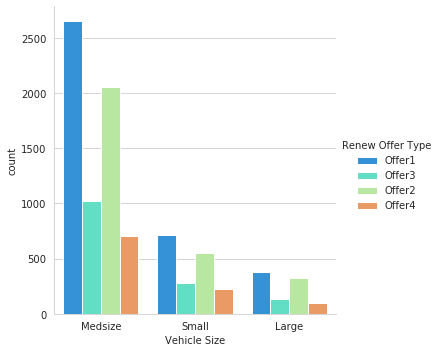

In [37]:
# Is the offer type related to the vehicle size?
sns.catplot(x='Vehicle Size', hue='Renew Offer Type', data=data,\
     kind='count', palette='rainbow')
plt.show()  # Nope

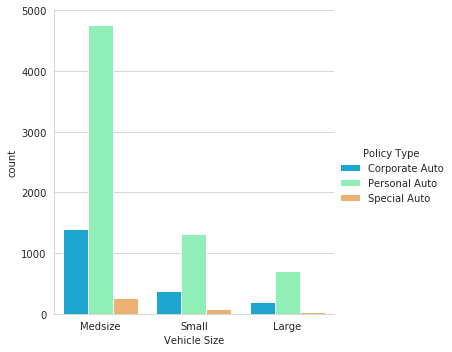

In [38]:
# Is the policy type related to the vehicle size?
sns.catplot(x='Vehicle Size', hue='Policy Type', data=data,\
     kind='count', palette='rainbow')
plt.show()  # Nope

#### 4. Plot time variable. Can you extract something from it?

We can plot the total claim amount against time to see if there is any variation.

In [44]:
# Change effective to date to datetime format
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

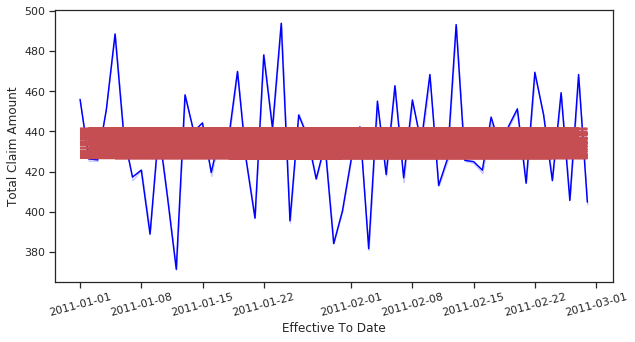

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x='Effective To Date', y='Total Claim Amount', data=data, \
    color='blue', ci=False)

# Linear regression for trendline
x = range(0, len(data['Effective To Date']))
z = np.polyfit(x, data['Total Claim Amount'], 1)
p = np.poly1d(z)
plt.plot(data['Effective To Date'], p(x), c="r", lw=0.3)

plt.xticks(rotation=15)
plt.show()

Although there is significant variance of the total claim amount depending on the date, there is no obvious trend that we can see over time.